In [1]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.image import resize
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original"
print(os.listdir(dataset_path))

['disco', 'metal', 'reggae', 'blues', 'rock', 'classical', 'jazz', 'hiphop', 'country', 'pop']


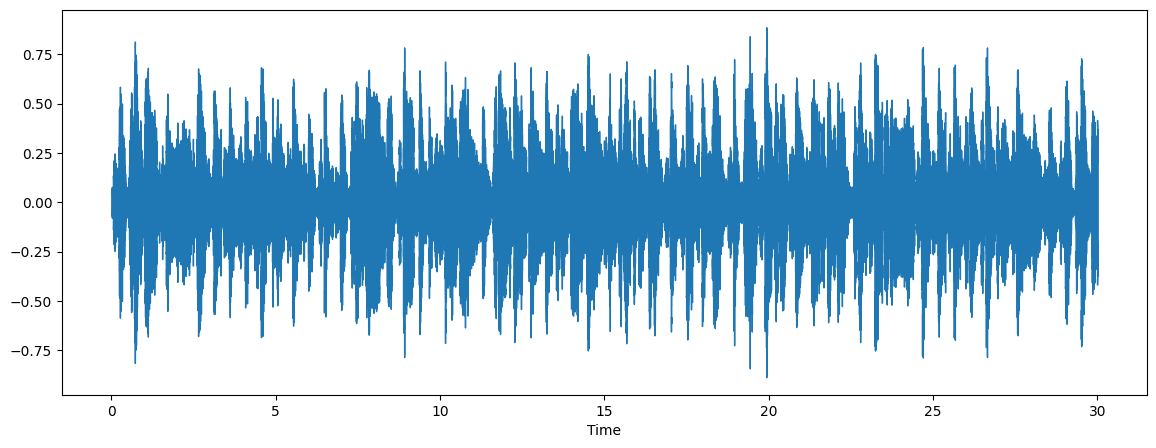

In [2]:
random_file = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav"

x, sr = librosa.load(random_file, sr=44100)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

# Chunking

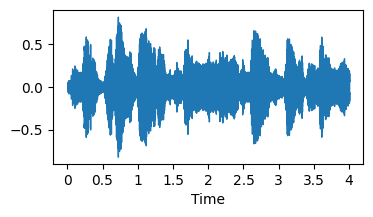

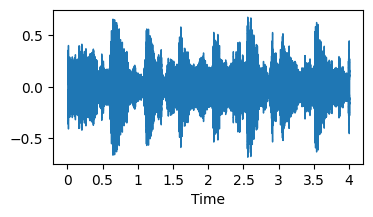

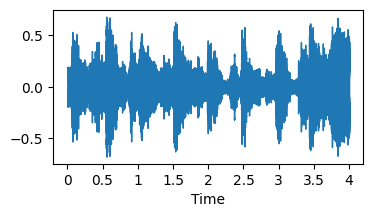

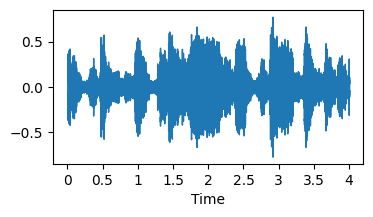

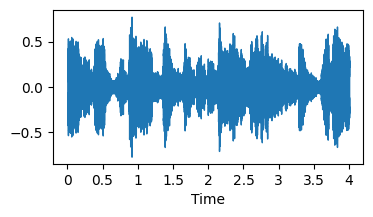

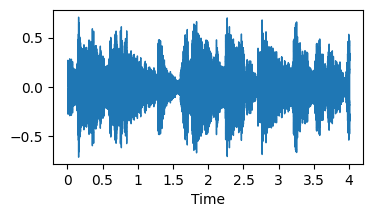

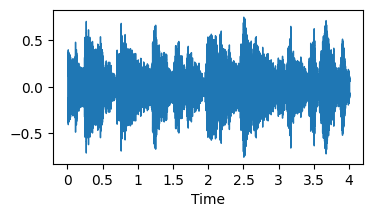

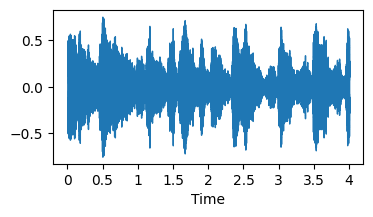

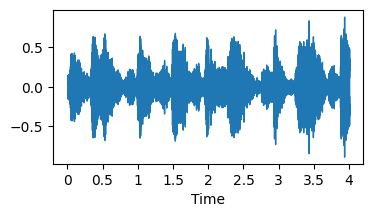

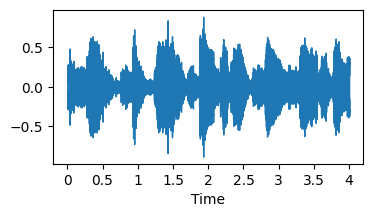

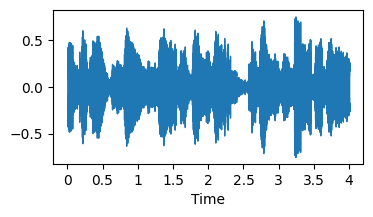

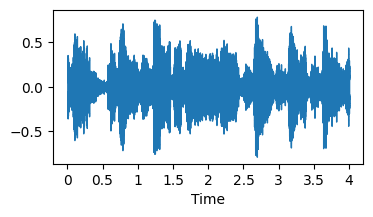

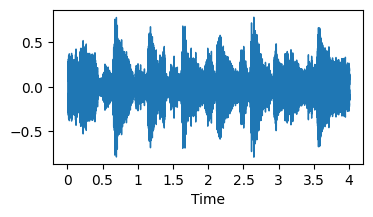

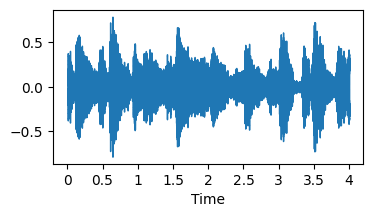

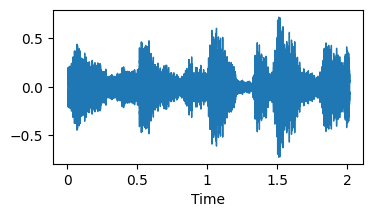

In [3]:
audio_path = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav"
y, sr = librosa.load(audio_path, sr=None) #Keep original sampling rate 

#Define duration of each chunk
chunk_duration = 4 #sec
overlap_duration = 2 #sec

#Convert duration to samples 
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

#Calculate the number of chunks 
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

#Iterate over each chunk
for i in range (num_chunks):
    #Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples

    #Extract the chunk of audio 
    chunk = y[start:end]
    plt.figure(figsize=(4,2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()

# Melspectrogram

In [4]:
#Plotting Melspectrogram of Entire audio
def plot_melspectrogram(y,sr):
    #Compute the spectrogram 
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    #Convert to db (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    #Visualize the spectrogram 
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='$+20f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()

#Plotting Melspectrogram of chunks 
def plot_melspectrogram_chunks(y,sr):
    #Define duration of each chunk and overlap
    chunk_duration = 4
    overlap_duration = 2

    #Convert duration to samples 
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr

    # Calculate the number of chunks
    num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
    
    # Iterate over each chunk
    for i in range(num_chunks):
        # Calculate start and end indices of the chunk
        start = i * (chunk_samples - overlap_samples)
        end = start + chunk_samples
        
        # Extract the chunk of audio
        chunk = y[start:end]

        #Compute the Mel Spectrogram for the chunk 
        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
        print(mel_spectrogram.shape)
        spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
        #Visualize the spectrogram 
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')
        plt.tight_layout()
        plt.show()

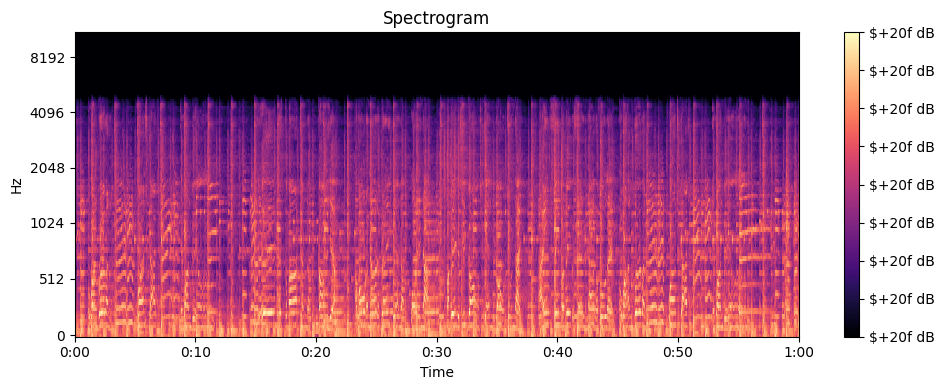

In [5]:
#Spectrogram of entire audio
plot_melspectrogram(y=x, sr=sr)

(128, 173)


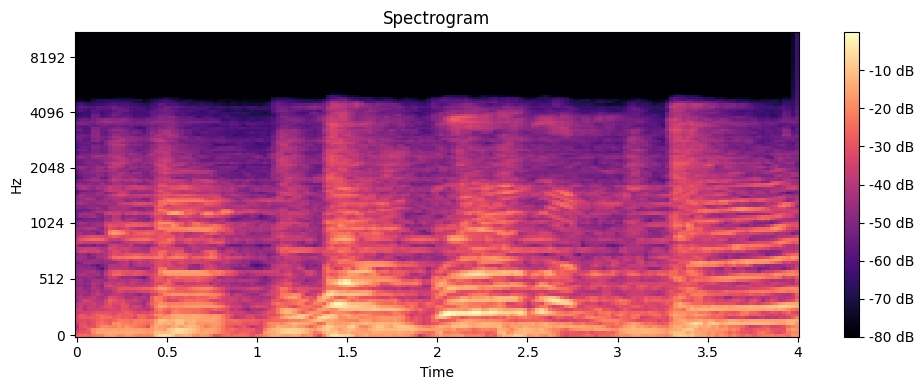

(128, 173)


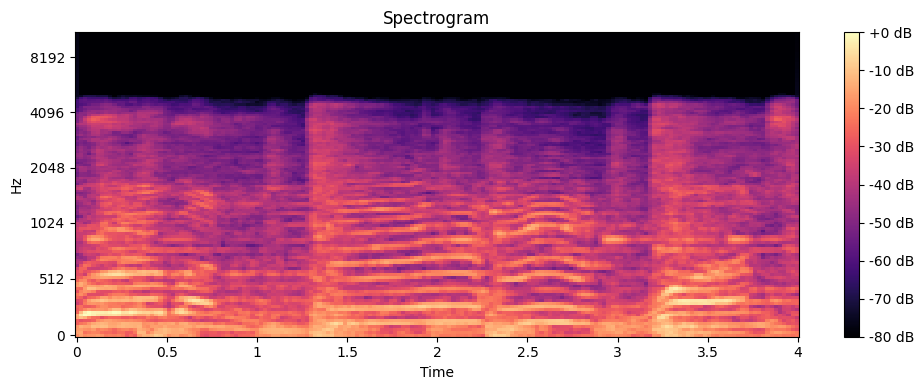

(128, 173)


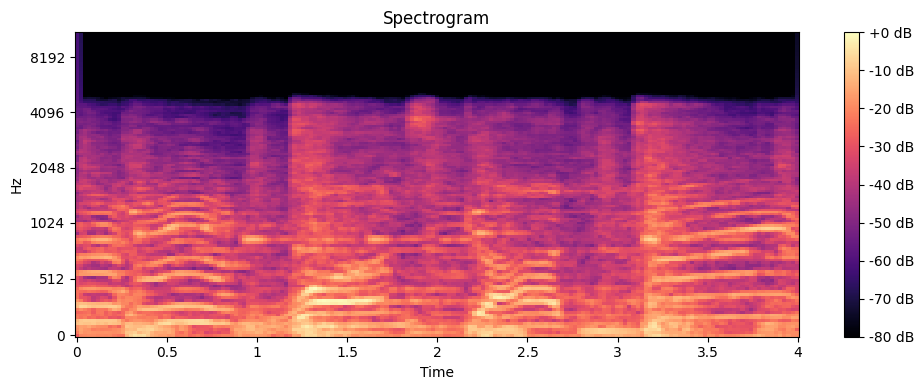

(128, 173)


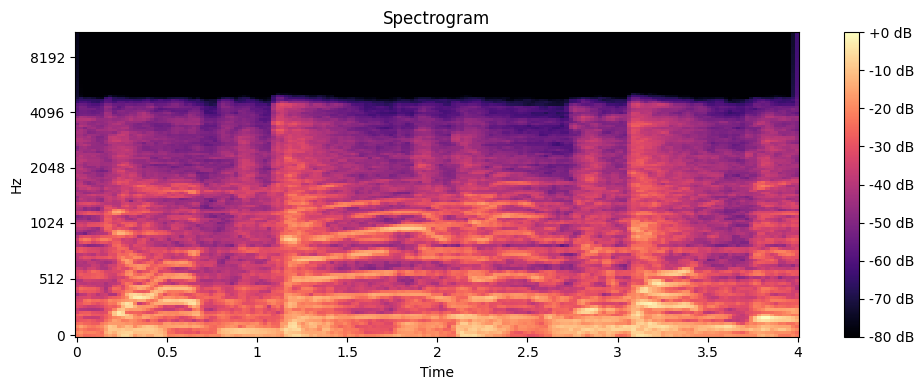

(128, 173)


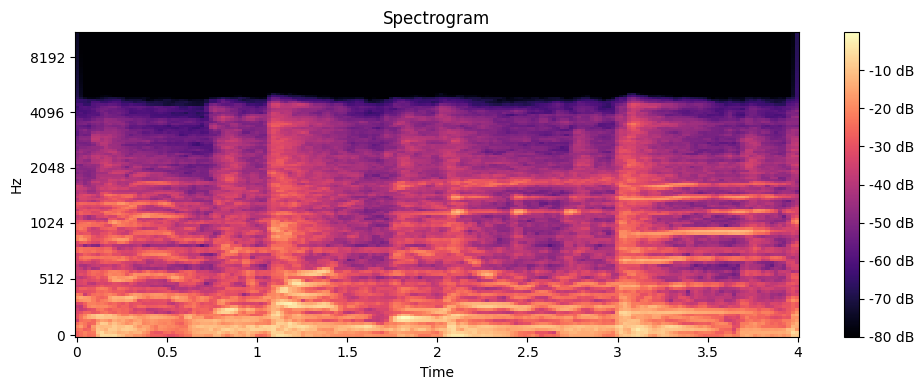

(128, 173)


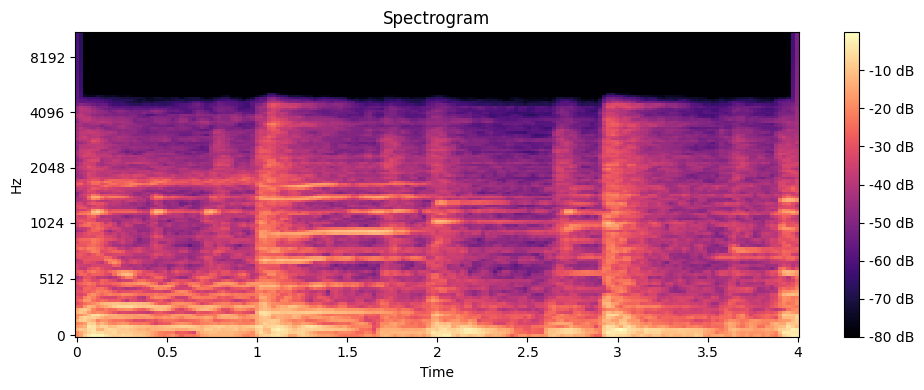

(128, 173)


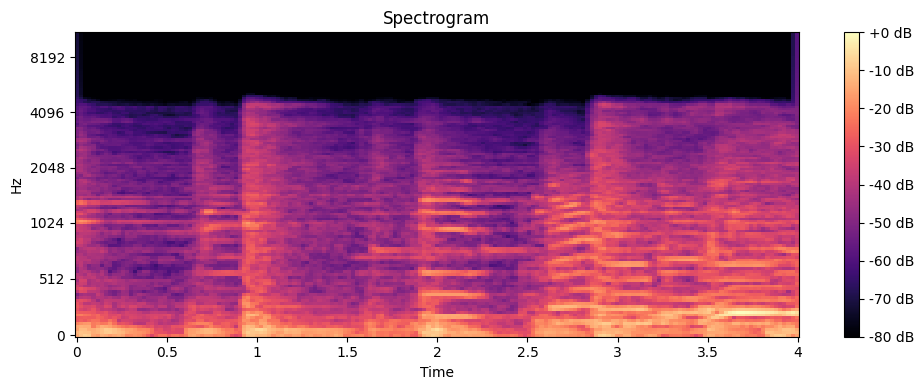

(128, 173)


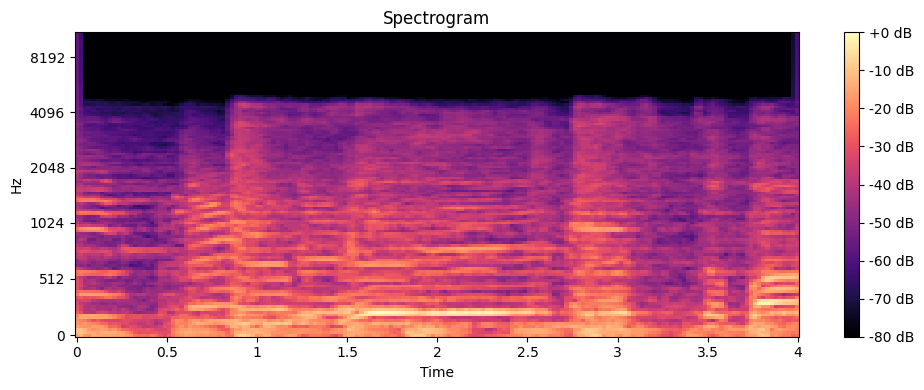

(128, 173)


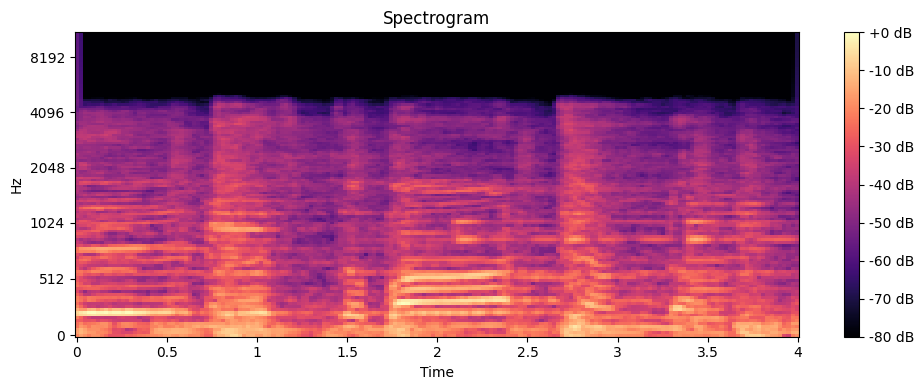

(128, 173)


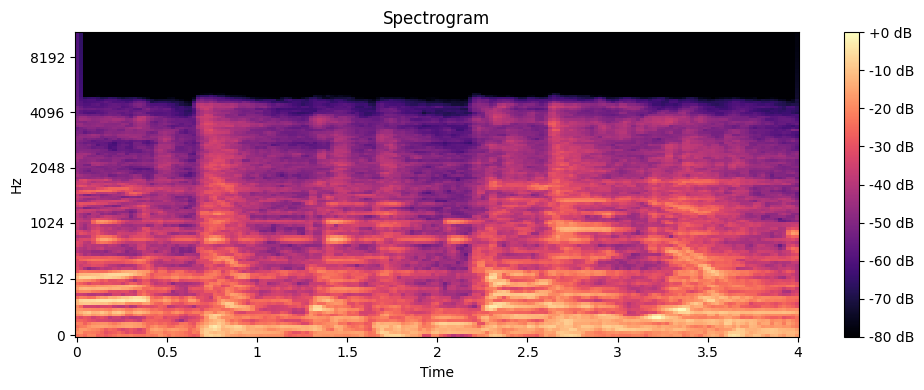

(128, 173)


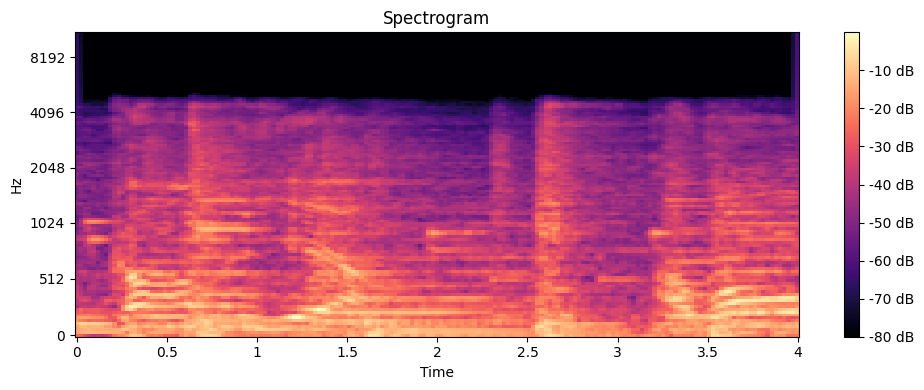

(128, 173)


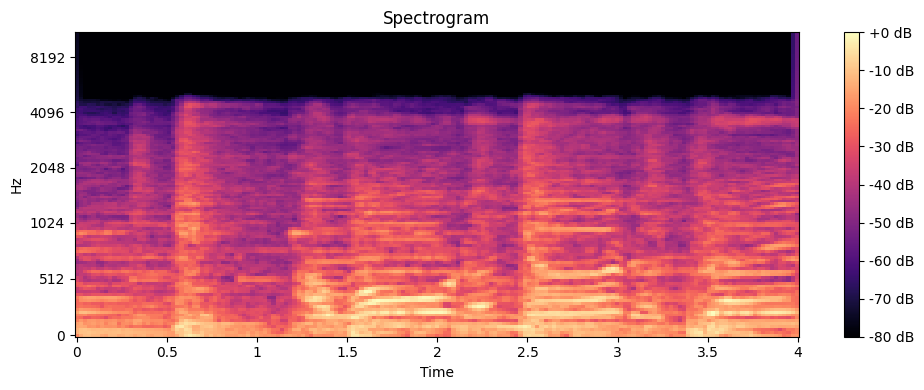

(128, 173)


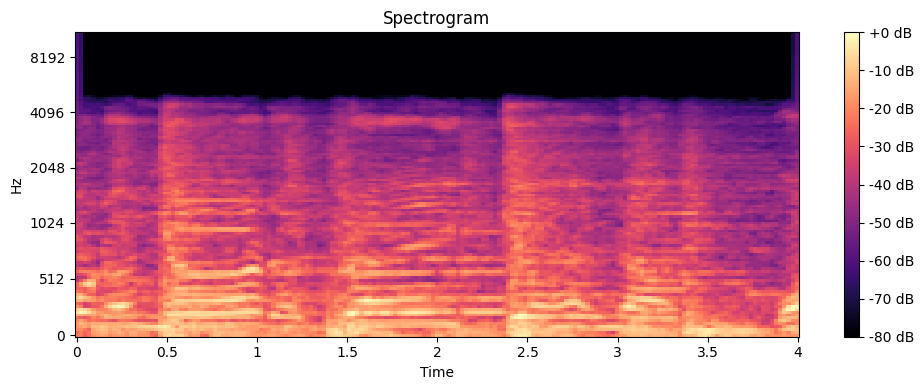

(128, 173)


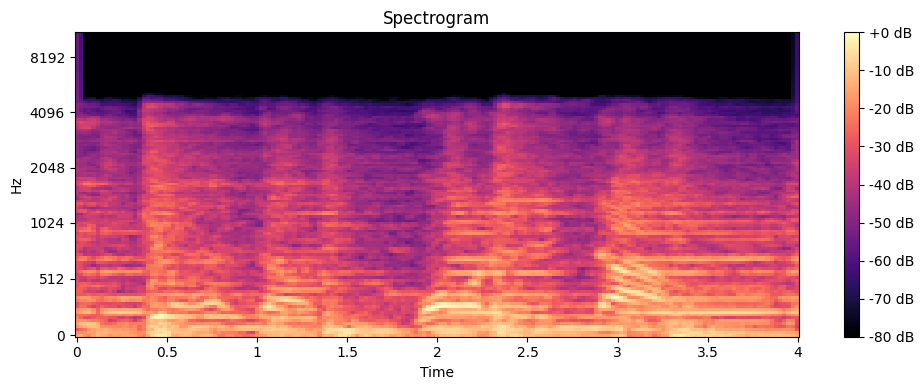

(128, 173)


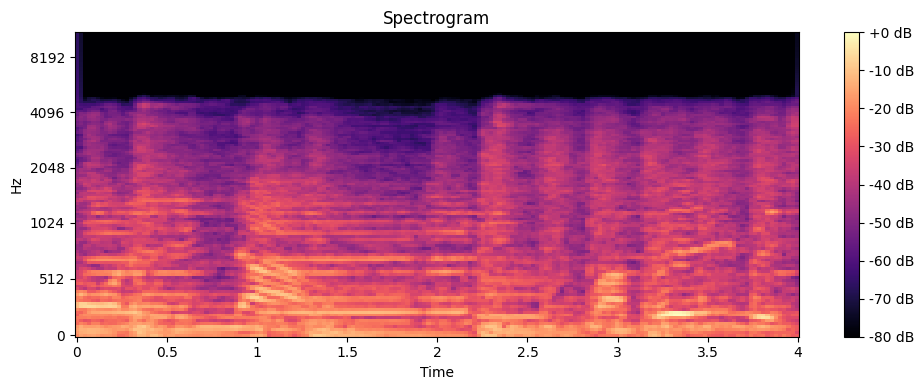

(128, 173)


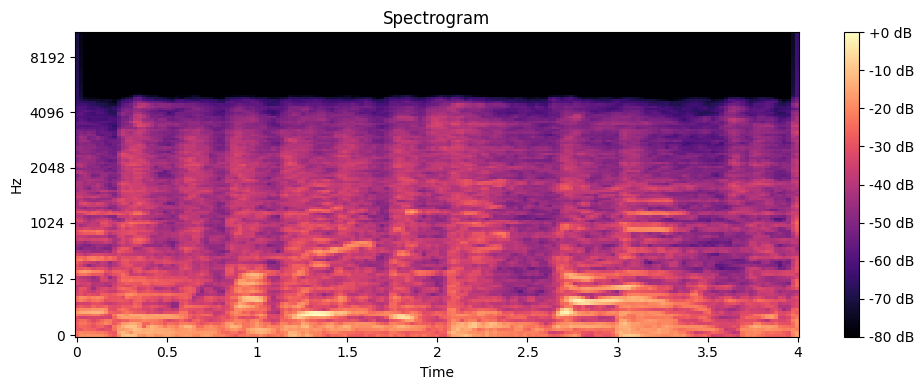

(128, 173)


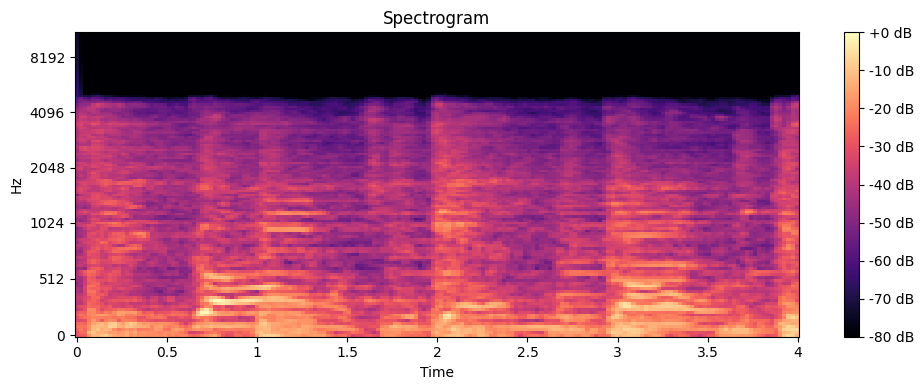

(128, 173)


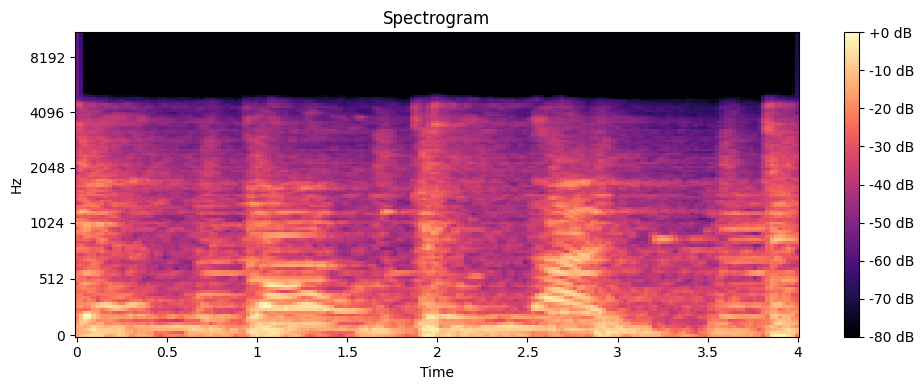

(128, 173)


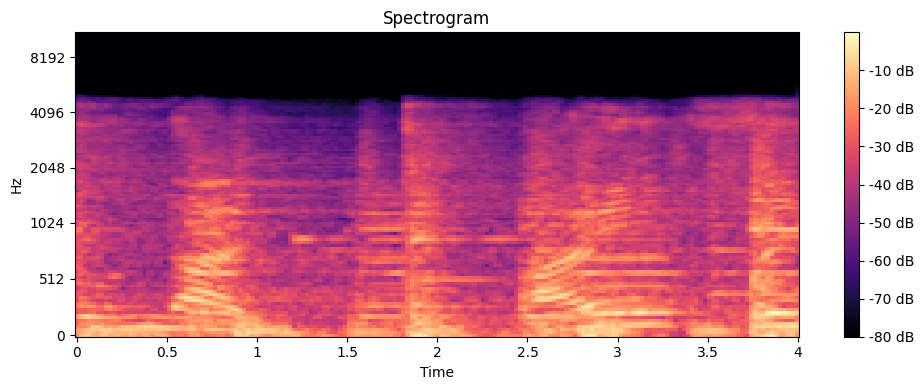

(128, 173)


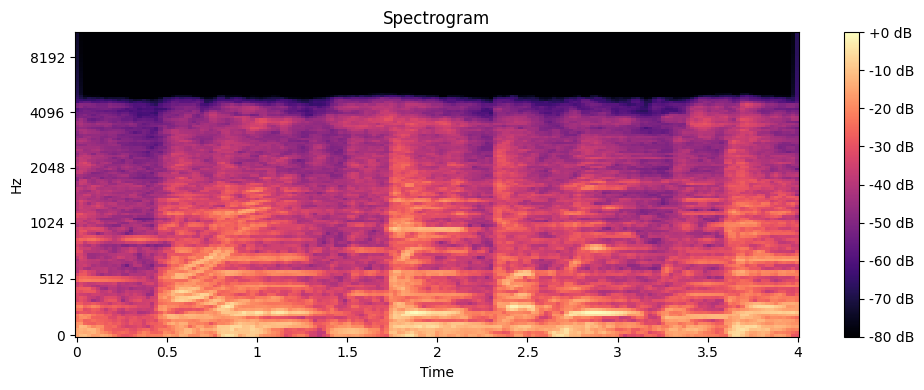

(128, 173)


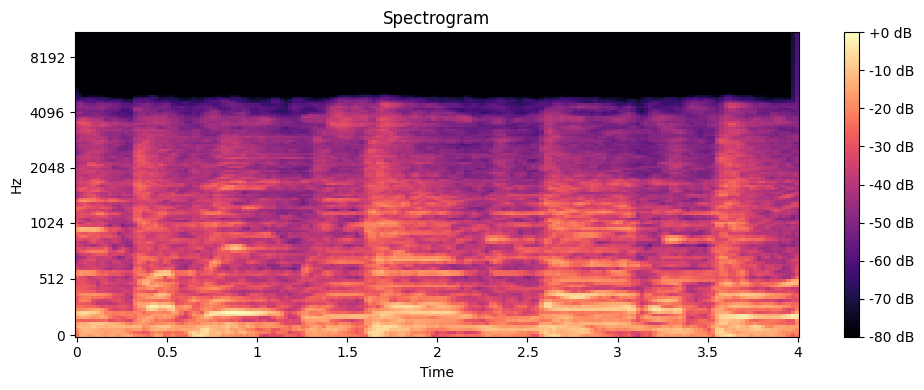

(128, 173)


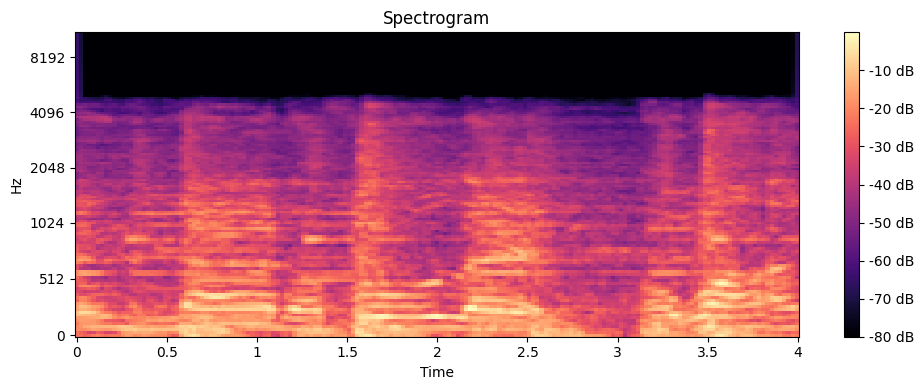

(128, 173)


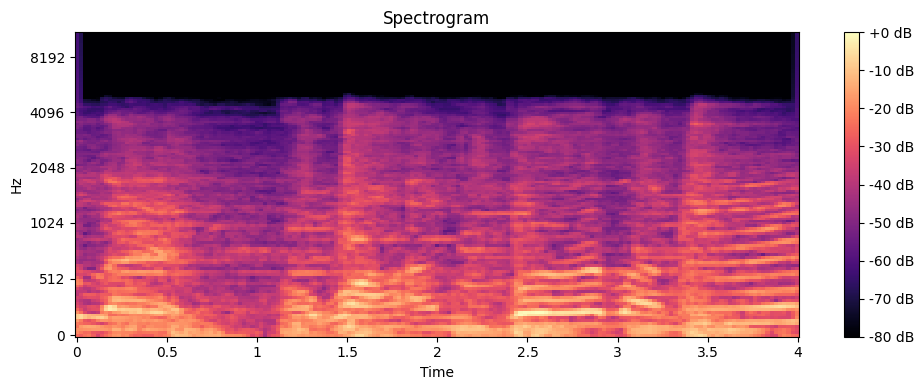

(128, 173)


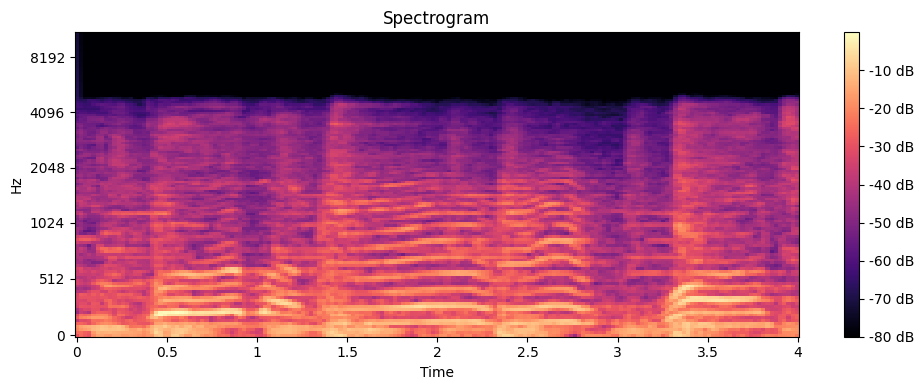

(128, 173)


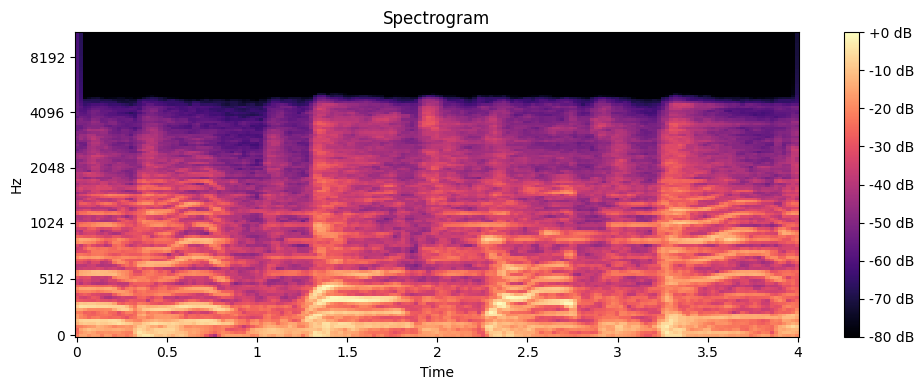

(128, 173)


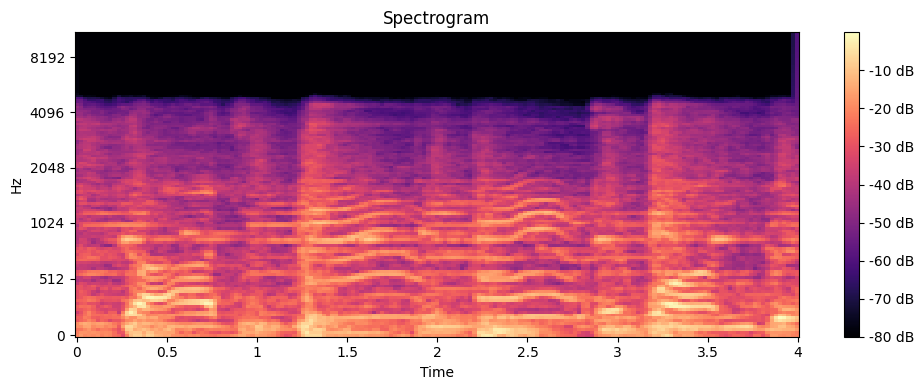

(128, 173)


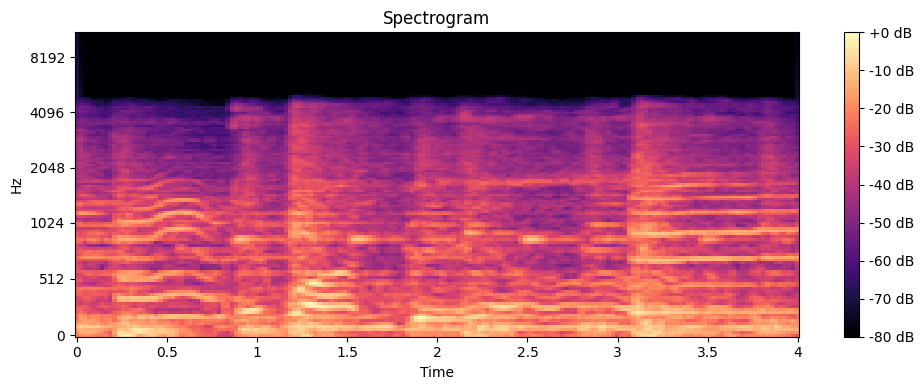

(128, 173)


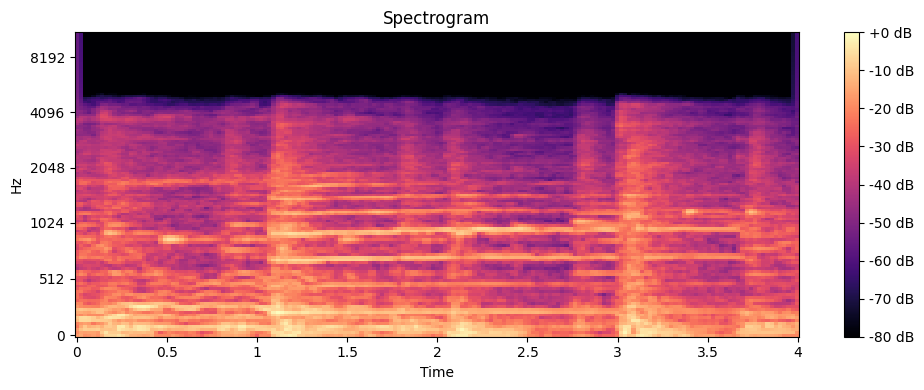

(128, 173)


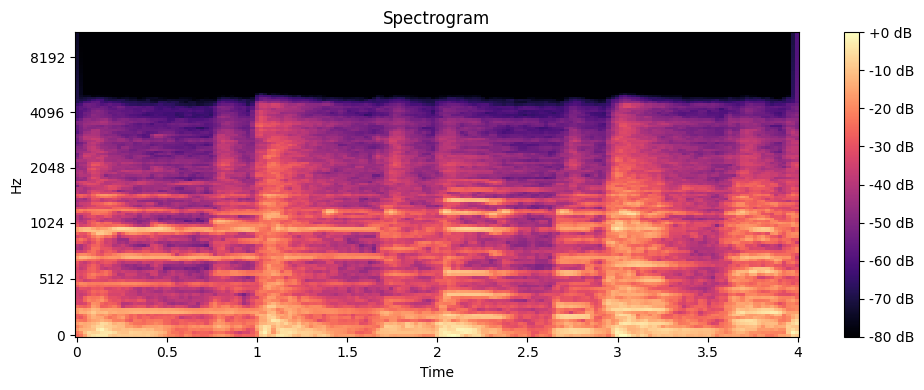

(128, 88)


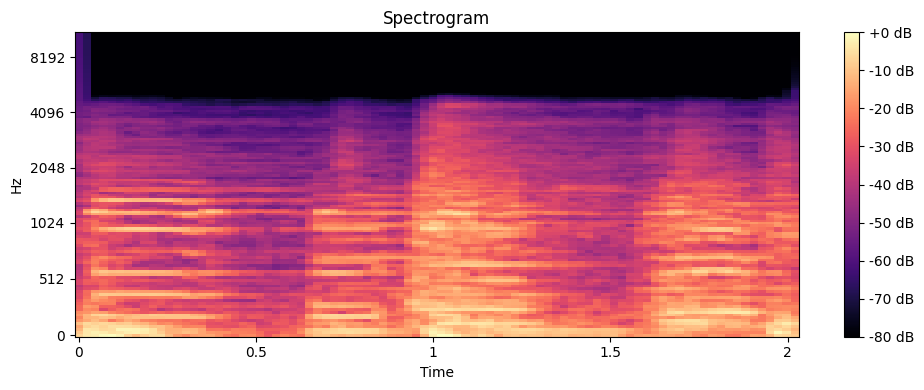

In [6]:
#Spectrogram of Chunks 
plot_melspectrogram_chunks(y=x, sr=sr)

# 2 Preprocessing


In [7]:
#Define folder structure
data_dir = '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original'
classes = ['blues', 'classical','country','disco','hiphop','jazz', 'metal', 'pop', 'reggae', 'rock']

In [8]:
from skimage.transform import resize

def load_and_preprocess_data(data_dir, classes, target_shape=(150, 150)):
    data = []
    labels = []
    
    chunk_duration = 4    # seconds
    overlap_duration = 2  # seconds
    
    for i_class, class_name in enumerate(classes):
        print(f"Processing {class_name}")
        
        class_dir = os.path.join(data_dir, class_name)
        try:
            for filename in os.listdir(class_dir):
                if filename.endswith('.wav'):
                    file_path = os.path.join(class_dir, filename)
                    try:
                        audio_data, sample_rate = librosa.load(file_path, sr=None)
                        chunk_samples = chunk_duration * sample_rate
                        overlap_samples = overlap_duration * sample_rate
                        step_size = chunk_samples - overlap_samples
                        
                        num_chunks = max(1, int(np.ceil(
                            (len(audio_data) - chunk_samples) / step_size)) + 1)
                        
                        for i in range(num_chunks):
                            start = i * step_size
                            end = min(start + chunk_samples, len(audio_data))
                            chunk = audio_data[start:end]
                            
                            mel_spectrogram = librosa.feature.melspectrogram(
                                y=chunk, sr=sample_rate)
                            mel_spectrogram = resize(
                                np.expand_dims(mel_spectrogram, axis=-1), 
                                target_shape)
                            
                            data.append(mel_spectrogram)
                            labels.append(i_class)
                    except Exception as e:
                        print(f"Error processing {filename}: {str(e)}")
        except Exception as e:
            print(f"Error accessing {class_dir}: {str(e)}")
            
    return np.array(data), np.array(labels)

In [9]:
#Split data into training and testing sets 
data, labels = load_and_preprocess_data(data_dir, classes)
#print("\nData:", data, "\nlabel", labels)

Processing blues
Processing classical
Processing country
Processing disco
Processing hiphop
Processing jazz


<ipython-input-8-ca115266ab60>:38: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sample_rate = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing jazz.00054.wav: 
Processing metal
Processing pop
Processing reggae
Processing rock


In [10]:
labels.shape

(14975,)

In [11]:
labels

array([0, 0, 0, ..., 9, 9, 9])

In [12]:
from tensorflow.keras.utils import to_categorical

#Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(classes)) 
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [13]:
labels.shape

(14975, 10)

In [14]:
data.shape

(14975, 150, 150, 1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [16]:
model = tf.keras.models.Sequential()

In [17]:
X_train[0].shape
#X_train.shape

(150, 150, 1)

In [18]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
def create_model(input_shape, num_classes):
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPool2D(pool_size=2, strides=2))

    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPool2D(pool_size=2, strides=2))

    model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPool2D(pool_size=2, strides=2))

    model.add(Dropout(0.3))

    model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
    model.add(MaxPool2D(pool_size=2, strides=2))

    model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
    model.add(MaxPool2D(pool_size=2, strides=2))

    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(units=1200, activation='relu'))
    model.add(Dropout(0.45))
    model.add(Dense(units=num_classes, activation='softmax'))

    return model

# 


Training with Adam optimizer...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 63ms/step - accuracy: 0.1920 - loss: 2.1679 - val_accuracy: 0.4327 - val_loss: 1.6506 - learning_rate: 1.0000e-04
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.4438 - loss: 1.5616 - val_accuracy: 0.5085 - val_loss: 1.3596 - learning_rate: 1.0000e-04
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.5694 - loss: 1.2138 - val_accuracy: 0.6407 - val_loss: 1.0348 - learning_rate: 1.0000e-04
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.6415 - loss: 1.0303 - val_accuracy: 0.7095 - val_loss: 0.8772 - learning_rate: 1.0000e-04
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.7065 - loss: 0.8550 - val_accuracy: 0.7352 - val_loss: 0.7949 - learning_rate: 1.0000e-04
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.7513 - loss: 0.7201 - val_accuracy: 0.7710 - val_loss: 0.6753 - learning_rate: 1.0000e-04
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/ste

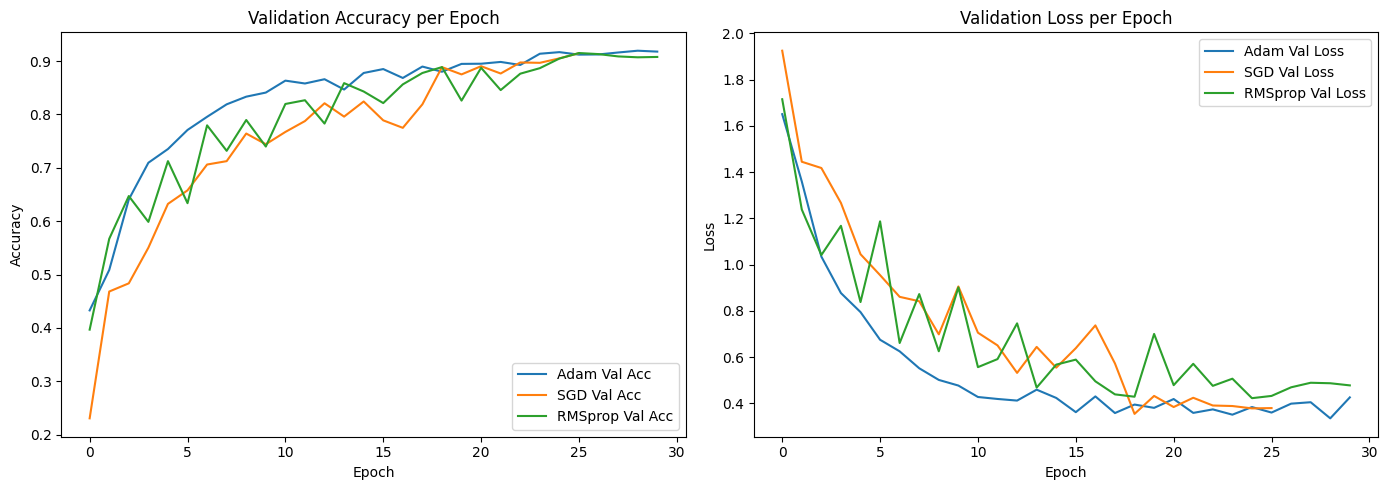

In [19]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import Sequential

optimizers = {
    'Adam': Adam(learning_rate=0.0001),
    'SGD': SGD(learning_rate=0.01, momentum=0.9),
    'RMSprop': RMSprop(learning_rate=0.0001)
}

results = {}

# Define input shape and number of classes
input_shape = X_train[0].shape  # Assuming X_train is a NumPy array or Tensor
num_classes = y_train.shape[1]  # Assuming y_train is one-hot encoded

# Train and evaluate each optimizer
for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer...")

    reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=5
    )
    early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
    
    model = create_model(input_shape, num_classes)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model (verbose=1 for progress updates)
    history = model.fit(X_train, y_train, epochs=30, batch_size=32,
                        validation_data=(X_test, y_test), verbose=1,
                       callbacks=[reduce_lr, early_stop])
    
    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    results[name] = {
        'model': model,
        'history': history.history,  # Store history as dict
        'test_loss': test_loss,
        'test_accuracy': test_acc
    }
    model.save(f'2DCNN_{name}.h5')
# Step 1: Print numerical comparison
print("\n=== Optimizer Performance Comparison ===")
print(f"{'Optimizer':<10} | {'Test Loss':<10} | {'Test Accuracy':<15}")
print("-" * 35)
for name, metrics in results.items():
    print(f"{name:<10} | {metrics['test_loss']:<10.4f} | {metrics['test_accuracy']:<15.4f}")

# Step 2: Plot training and validation metrics
plt.figure(figsize=(14, 5))

# Plot 1: Validation Accuracy
plt.subplot(1, 2, 1)
for name, metrics in results.items():
    plt.plot(metrics['history']['val_accuracy'], label=f"{name} Val Acc")
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot 2: Validation Loss
plt.subplot(1, 2, 2)
for name, metrics in results.items():
    plt.plot(metrics['history']['val_loss'], label=f"{name} Val Loss")
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
import numpy as np

predictions = {}

for name, wrap in results.items():
    # Get predictions
    y_pred = wrap['model'].predict(X_test)
    
    # Convert probabilities to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)

    predictions[name] = {
        'predictons': y_pred,
        'predicted_classes': y_pred_classes
    }
    
# Convert one-hot true labels to class labels
y_true_classes = np.argmax(y_test, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


              precision    recall  f1-score   support

       blues       0.92      0.93      0.93       302
   classical       0.96      0.96      0.96       298
     country       0.94      0.79      0.86       317
       disco       0.95      0.93      0.94       312
      hiphop       0.95      0.95      0.95       277
        jazz       0.89      0.95      0.92       311
       metal       0.91      0.95      0.93       302
         pop       0.92      0.93      0.93       289
      reggae       0.92      0.94      0.93       296
        rock       0.83      0.87      0.85       291

    accuracy                           0.92      2995
   macro avg       0.92      0.92      0.92      2995
weighted avg       0.92      0.92      0.92      2995



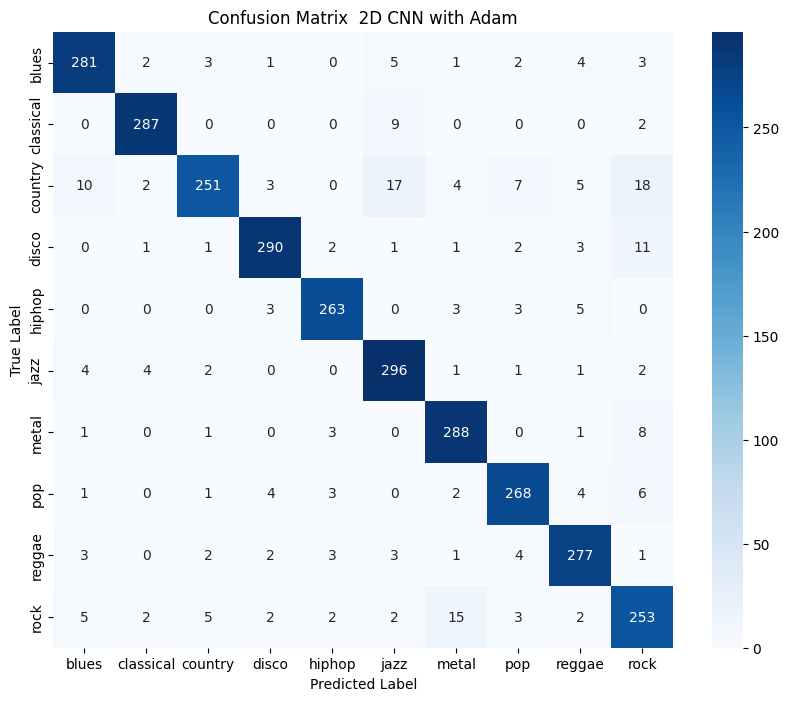

              precision    recall  f1-score   support

       blues       0.90      0.91      0.91       302
   classical       0.96      0.96      0.96       298
     country       0.84      0.84      0.84       317
       disco       0.89      0.89      0.89       312
      hiphop       0.95      0.90      0.92       277
        jazz       0.86      0.95      0.90       311
       metal       0.93      0.93      0.93       302
         pop       0.92      0.82      0.87       289
      reggae       0.93      0.88      0.90       296
        rock       0.75      0.80      0.77       291

    accuracy                           0.89      2995
   macro avg       0.89      0.89      0.89      2995
weighted avg       0.89      0.89      0.89      2995



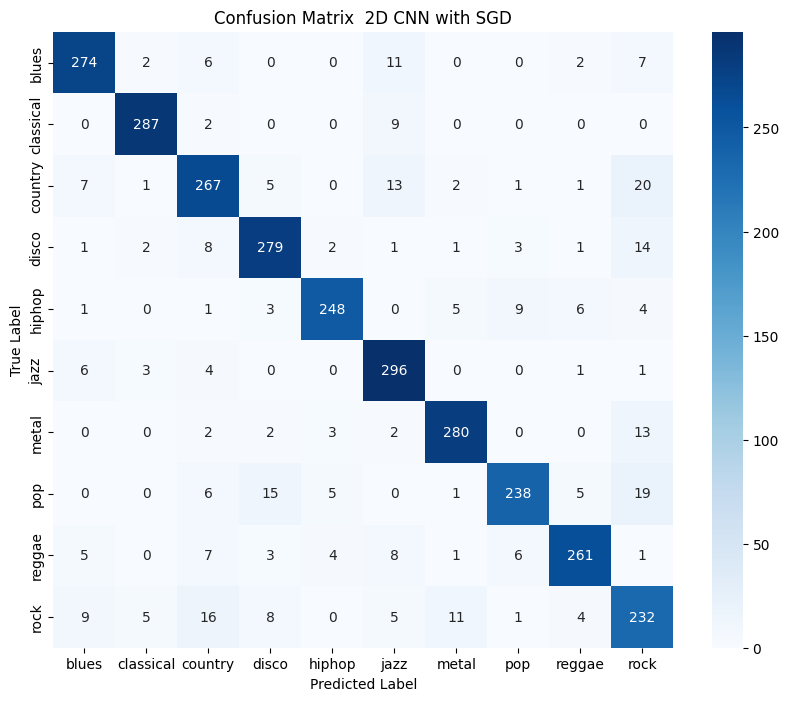

              precision    recall  f1-score   support

       blues       0.89      0.93      0.91       302
   classical       0.91      0.98      0.94       298
     country       0.89      0.83      0.85       317
       disco       0.93      0.89      0.91       312
      hiphop       0.96      0.93      0.95       277
        jazz       0.87      0.95      0.91       311
       metal       0.94      0.93      0.94       302
         pop       0.95      0.90      0.92       289
      reggae       0.89      0.91      0.90       296
        rock       0.83      0.80      0.81       291

    accuracy                           0.90      2995
   macro avg       0.91      0.91      0.90      2995
weighted avg       0.91      0.90      0.90      2995



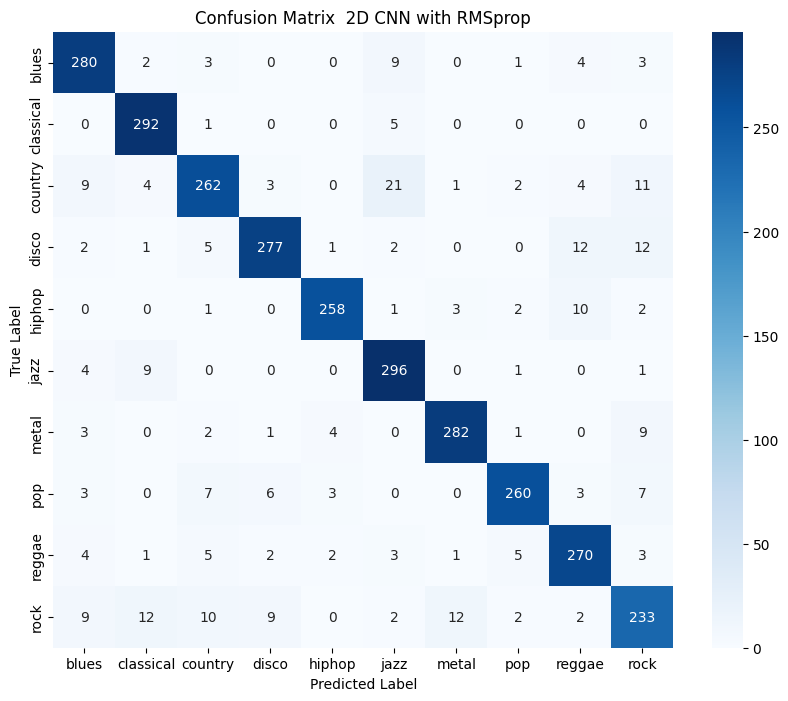

In [21]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

for name, y_pred in predictions.items():
    print(classification_report(y_true_classes, y_pred['predicted_classes'], target_names=classes))
    # Compute confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred['predicted_classes'])
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix  2D CNN with {name}")
    plt.savefig(f'2dcnn{name}_confusion_matrix.png')
    plt.show()

